In [37]:
import numpy as np
import pandas as pd

In [38]:
df = pd.read_csv("NYC.csv")

In [39]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579487 entries, 0 to 579486
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  579487 non-null  object 
 1   vendor_id           579487 non-null  int64  
 2   pickup_datetime     579487 non-null  object 
 3   dropoff_datetime    579487 non-null  object 
 4   passenger_count     579487 non-null  int64  
 5   pickup_longitude    579487 non-null  float64
 6   pickup_latitude     579487 non-null  float64
 7   dropoff_longitude   579487 non-null  float64
 8   dropoff_latitude    579487 non-null  float64
 9   store_and_fwd_flag  579487 non-null  object 
 10  trip_duration       579487 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 48.6+ MB


In [41]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,579487.000000,579487.000000,579487.000000,579487.000000,579487.000000,579487.000000,5.794870e+05
mean,1.534490,1.663156,-73.973520,40.750979,-73.973378,40.751826,9.522608e+02
std,0.498809,1.312486,0.039595,0.033537,0.038782,0.035296,4.028999e+03
min,1.000000,0.000000,-77.896019,34.712234,-79.817978,32.181141,1.000000e+00
25%,1.000000,1.000000,-73.991882,40.737335,-73.991325,40.735931,3.970000e+02
50%,2.000000,1.000000,-73.981766,40.754131,-73.979729,40.754478,6.620000e+02
75%,2.000000,2.000000,-73.967331,40.768353,-73.963005,40.769783,1.075000e+03
max,2.000000,9.000000,-70.511902,51.881084,-70.511902,43.486885,1.939736e+06


In [42]:
df["passenger_count"].value_counts()

,count
passenger_count,
1,410754
2,83670
5,31127
3,23697
6,19029
4,11190
0,17
7,2
9,1


In [43]:
df["store_and_fwd_flag"].value_counts()

,count
store_and_fwd_flag,
N,576197
Y,3290


## Column which will not affect our target - id

In [44]:
df["id"].nunique()

579487

In [45]:
df.shape

(579487, 11)

In [46]:
df.duplicated().sum() # No duplicated values.

0

In [47]:
df.isnull().sum() # No Null Values

,0
id,0
vendor_id,0
pickup_datetime,0
dropoff_datetime,0
passenger_count,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
store_and_fwd_flag,0


In [48]:
df["vendor_id"].value_counts()

,count
vendor_id,
2,309730
1,269757


In [49]:
df.drop("id",axis=1,inplace=True) # Dropped the id column.

## Our Analysis -
- Id is just used for identification, Hence, It will not affect out targer variable that is trip_duration.
- Pickup/dropoff date time needs to be divided into date and time columns.
- There are no NULL VALUES in the dataset.
- There are no DUPLICATE ROWS in the dataset.
- Passenger_count has possible outliers.

## Trip Duration is our target variable

## TO DO
- Seperate pickup/dropoff date and time
- Convert date time into date time data type
- Check for more outliers and handle them.

In [51]:
#Pickup and Dropoff Date_time
#Seperating pickup date and pickup time and dropoff date and dropoff time
pickup_date = []
pickup_time = []
dropoff_date = []
dropoff_time = []

for i in range(0,df.shape[0]):
    a = df["pickup_datetime"][i].split(" ")
    b = df["dropoff_datetime"][i].split(" ")
    pickup_date.append(a[0])
    pickup_time.append(a[1])
    dropoff_date.append(b[0])
    dropoff_time.append(b[1])

pickup_date = pd.Series(pickup_date)
pickup_time = pd.Series(pickup_time)
dropoff_date = pd.Series(dropoff_date)
dropoff_time = pd.Series(dropoff_time)

df2 = pd.concat([df,pickup_date,pickup_time,dropoff_date,dropoff_time],axis=1)


In [52]:
df2.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,0,1,2,3
0,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,17:24:55,2016-03-14,17:32:30
1,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,00:43:35,2016-06-12,00:54:38
2,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,11:35:24,2016-01-19,12:10:48
3,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06,19:32:31,2016-04-06,19:39:40
4,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,13:30:55,2016-03-26,13:38:10


In [53]:
# Changing column names
new_column = {0:"pickup_date",1:"pickup_time",2:"dropoff_date",3:"dropoff_time"}
df2.rename(columns=new_column,inplace=True)

In [54]:
df2.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_time,dropoff_date,dropoff_time
0,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,17:24:55,2016-03-14,17:32:30
1,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,00:43:35,2016-06-12,00:54:38
2,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,11:35:24,2016-01-19,12:10:48
3,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06,19:32:31,2016-04-06,19:39:40
4,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,13:30:55,2016-03-26,13:38:10


In [55]:
# Dropping pickup_datetime and dropoff datetime columns
df2.drop(["pickup_datetime","dropoff_datetime"],axis=1,inplace=True)

In [56]:
df2.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_time,dropoff_date,dropoff_time
0,2,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,17:24:55,2016-03-14,17:32:30
1,1,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,00:43:35,2016-06-12,00:54:38
2,2,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,11:35:24,2016-01-19,12:10:48
3,2,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06,19:32:31,2016-04-06,19:39:40
4,2,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,13:30:55,2016-03-26,13:38:10


In [57]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579487 entries, 0 to 579486
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   vendor_id           579487 non-null  int64  
 1   passenger_count     579487 non-null  int64  
 2   pickup_longitude    579487 non-null  float64
 3   pickup_latitude     579487 non-null  float64
 4   dropoff_longitude   579487 non-null  float64
 5   dropoff_latitude    579487 non-null  float64
 6   store_and_fwd_flag  579487 non-null  object 
 7   trip_duration       579487 non-null  int64  
 8   pickup_date         579487 non-null  object 
 9   pickup_time         579487 non-null  object 
 10  dropoff_date        579487 non-null  object 
 11  dropoff_time        579487 non-null  object 
dtypes: float64(4), int64(3), object(5)
memory usage: 53.1+ MB


In [58]:
# Changing Datatype
df2["pickup_date"] = pd.to_datetime(df2["pickup_date"])
df2["pickup_time"] = pd.to_datetime(df2["pickup_time"])
df2["dropoff_date"] = pd.to_datetime(df2["dropoff_date"])
df2["dropoff_time"] = pd.to_datetime(df2["dropoff_time"])

<ipython-input-58-d335616aad8f>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df2["pickup_time"] = pd.to_datetime(df2["pickup_time"])
<ipython-input-58-d335616aad8f>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df2["dropoff_time"] = pd.to_datetime(df2["dropoff_time"])


In [59]:
df2.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_time,dropoff_date,dropoff_time
0,2,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,2024-09-08 17:24:55,2016-03-14,2024-09-08 17:32:30
1,1,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,2024-09-08 00:43:35,2016-06-12,2024-09-08 00:54:38
2,2,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,2024-09-08 11:35:24,2016-01-19,2024-09-08 12:10:48
3,2,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06,2024-09-08 19:32:31,2016-04-06,2024-09-08 19:39:40
4,2,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,2024-09-08 13:30:55,2016-03-26,2024-09-08 13:38:10


In [60]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579487 entries, 0 to 579486
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   vendor_id           579487 non-null  int64         
 1   passenger_count     579487 non-null  int64         
 2   pickup_longitude    579487 non-null  float64       
 3   pickup_latitude     579487 non-null  float64       
 4   dropoff_longitude   579487 non-null  float64       
 5   dropoff_latitude    579487 non-null  float64       
 6   store_and_fwd_flag  579487 non-null  object        
 7   trip_duration       579487 non-null  int64         
 8   pickup_date         579487 non-null  datetime64[ns]
 9   pickup_time         579487 non-null  datetime64[ns]
 10  dropoff_date        579487 non-null  datetime64[ns]
 11  dropoff_time        579487 non-null  datetime64[ns]
dtypes: datetime64[ns](4), float64(4), int64(3), object(1)
memory usage: 53.1+ MB


In [61]:
# Checking if pickup date and drop off dates are different
a = 0
for i in range(0,df.shape[0]):
    if(df2["pickup_date"][i] == df2["dropoff_date"][i]):
        a = 1
        if(a == 0):
            x = df2("pickup_date")[i]
            y = df2("dropoff_date")[i]
            print(f"Date is different. Pickup Date = {x} and Dropoff Date is {y}")

In [63]:
# Checking if there are more than one taxi running on a single date
df.shape[0] - df2.duplicated(subset="pickup_date").sum()

182

In [64]:
df2.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_time,dropoff_date,dropoff_time
0,2,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,2024-09-08 17:24:55,2016-03-14,2024-09-08 17:32:30
1,1,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,2024-09-08 00:43:35,2016-06-12,2024-09-08 00:54:38
2,2,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,2024-09-08 11:35:24,2016-01-19,2024-09-08 12:10:48
3,2,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06,2024-09-08 19:32:31,2016-04-06,2024-09-08 19:39:40
4,2,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,2024-09-08 13:30:55,2016-03-26,2024-09-08 13:38:10


In [65]:
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [66]:
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"])
df["dropoff_datetime"] = pd.to_datetime(df["dropoff_datetime"])

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579487 entries, 0 to 579486
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   vendor_id           579487 non-null  int64         
 1   pickup_datetime     579487 non-null  datetime64[ns]
 2   dropoff_datetime    579487 non-null  datetime64[ns]
 3   passenger_count     579487 non-null  int64         
 4   pickup_longitude    579487 non-null  float64       
 5   pickup_latitude     579487 non-null  float64       
 6   dropoff_longitude   579487 non-null  float64       
 7   dropoff_latitude    579487 non-null  float64       
 8   store_and_fwd_flag  579487 non-null  object        
 9   trip_duration       579487 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(3), object(1)
memory usage: 44.2+ MB


In [68]:
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [69]:
# Handling Outliers
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='passenger_count'>

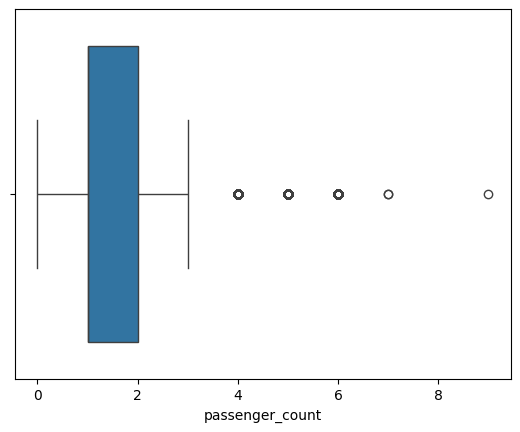

In [70]:
sns.boxplot(data = df,x = "passenger_count")

In [71]:
df["passenger_count"].value_counts()

,count
passenger_count,
1,410754
2,83670
5,31127
3,23697
6,19029
4,11190
0,17
7,2
9,1


In [72]:
for i in range(0,df.shape[0]):
    if(df["passenger_count"][i] in [0,7,9]):
        df["passenger_count"].replace(df["passenger_count"][i],np.nan,inplace=True)

In [73]:
df["passenger_count"].value_counts()

,count
passenger_count,
1.0,410754
2.0,83670
5.0,31127
3.0,23697
6.0,19029
4.0,11190


In [74]:
df.isnull().sum()

,0
vendor_id,0
pickup_datetime,0
dropoff_datetime,0
passenger_count,20
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
store_and_fwd_flag,0
trip_duration,0


In [75]:
df.dropna(inplace=True)

In [76]:
df.isnull().sum()

,0
vendor_id,0
pickup_datetime,0
dropoff_datetime,0
passenger_count,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
store_and_fwd_flag,0
trip_duration,0


In [77]:
df.shape

(579467, 10)

In [78]:
df2.shape

(579487, 12)

<Axes: xlabel='passenger_count'>

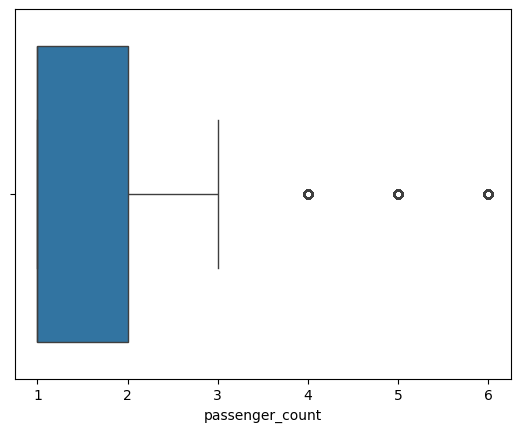

In [79]:
sns.boxplot(data = df,x = "passenger_count")

In [80]:
df["passenger_count"].value_counts()

,count
passenger_count,
1.0,410754
2.0,83670
5.0,31127
3.0,23697
6.0,19029
4.0,11190


In [81]:
df.describe()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,579467.000000,579467,579467,579467.000000,579467.000000,579467.000000,579467.000000,579467.000000,5.794670e+05
mean,1.534486,2016-04-01 08:15:14.315374336,2016-04-01 08:31:06.448962048,1.663173,-73.973521,40.750980,-73.973379,40.751826,9.521336e+02
min,1.000000,2016-01-01 00:00:17,2016-01-01 00:03:31,1.000000,-77.896019,34.712234,-79.817978,32.181141,1.000000e+00
25%,1.000000,2016-02-17 14:18:04,2016-02-17 14:32:04.500000,1.000000,-73.991882,40.737339,-73.991325,40.735931,3.970000e+02
50%,2.000000,2016-04-01 15:15:57,2016-04-01 15:34:59,1.000000,-73.981766,40.754131,-73.979729,40.754478,6.620000e+02
75%,2.000000,2016-05-15 01:05:14,2016-05-15 01:22:02.500000,2.000000,-73.967331,40.768353,-73.963005,40.769783,1.075000e+03
max,2.000000,2016-06-30 23:59:39,2016-07-01 22:10:26,6.000000,-70.511902,51.881084,-70.511902,43.486885,1.939736e+06
std,0.498810,NaN,NaN,1.312405,0.039592,0.033537,0.038778,0.035296,4.027519e+03


In [82]:
# Handling Outliters
iqr = df["passenger_count"].quantile(0.75) - df["passenger_count"].quantile(0.25)

upper_limit = df["passenger_count"].quantile(0.75) + 1.5 * iqr
lower_limit = df["passenger_count"].quantile(0.25) - 1.5 * iqr

In [83]:
upper_limit, lower_limit

(3.5, -0.5)

In [88]:
upper_limit = 2
lower_limit = 1

In [89]:
df["passenger_count"] = np.where(df["passenger_count"] < upper_limit,df["passenger_count"],upper_limit)

In [90]:
df["passenger_count"].value_counts()

,count
passenger_count,
1.0,410754
2.0,168713


<Axes: xlabel='passenger_count'>

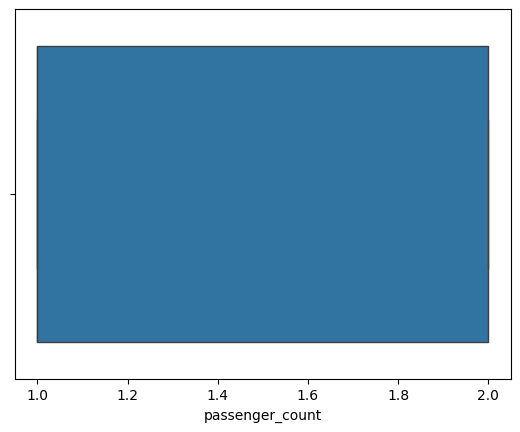

In [91]:
sns.boxplot(data=df,x="passenger_count")

In [92]:
df.describe()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,579467.000000,579467,579467,579467.000000,579467.000000,579467.000000,579467.000000,579467.000000,5.794670e+05
mean,1.534486,2016-04-01 08:15:14.315374336,2016-04-01 08:31:06.448962048,1.291152,-73.973521,40.750980,-73.973379,40.751826,9.521336e+02
min,1.000000,2016-01-01 00:00:17,2016-01-01 00:03:31,1.000000,-77.896019,34.712234,-79.817978,32.181141,1.000000e+00
25%,1.000000,2016-02-17 14:18:04,2016-02-17 14:32:04.500000,1.000000,-73.991882,40.737339,-73.991325,40.735931,3.970000e+02
50%,2.000000,2016-04-01 15:15:57,2016-04-01 15:34:59,1.000000,-73.981766,40.754131,-73.979729,40.754478,6.620000e+02
75%,2.000000,2016-05-15 01:05:14,2016-05-15 01:22:02.500000,2.000000,-73.967331,40.768353,-73.963005,40.769783,1.075000e+03
max,2.000000,2016-06-30 23:59:39,2016-07-01 22:10:26,2.000000,-70.511902,51.881084,-70.511902,43.486885,1.939736e+06
std,0.498810,NaN,NaN,0.454294,0.039592,0.033537,0.038778,0.035296,4.027519e+03


# passenger_count outliers handled

In [93]:
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1.0,-73.982155,40.767937,-73.964630,40.765602,N,455
1,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1.0,-73.980415,40.738564,-73.999481,40.731152,N,663
2,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1.0,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1.0,-74.010040,40.719971,-74.012268,40.706718,N,429
4,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1.0,-73.973053,40.793209,-73.972923,40.782520,N,435


<Axes: xlabel='pickup_longitude'>

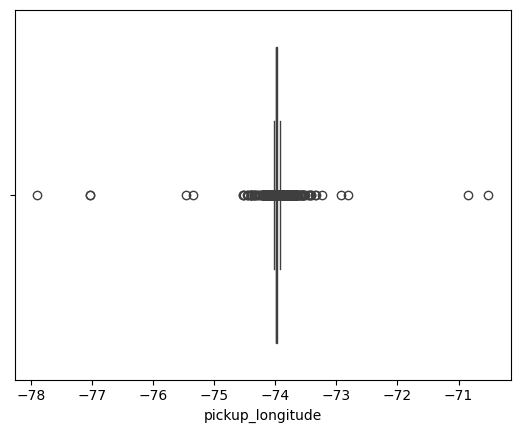

In [94]:
sns.boxplot(data=df,x="pickup_longitude")

In [95]:
from math import sin, cos, sqrt, atan2, radians

def calculate_distance(lat1, lon1, lat2, lon2):

    lat1_rad = radians(lat1)
    lon1_rad = radians(lon1)
    lat2_rad = radians(lat2)
    lon2_rad = radians(lon2)

    radius = 6371.0

    dlon = lon2_rad - lon1_rad
    dlat = lat2_rad - lat1_rad

    a = sin(dlat / 2)**2 + cos(lat1_rad) * cos(lat2_rad) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = radius * c

    return distance

In [96]:
df.isnull().sum()

,0
vendor_id,0
pickup_datetime,0
dropoff_datetime,0
passenger_count,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
store_and_fwd_flag,0
trip_duration,0


In [97]:
a = []

for i in range(df.shape[0]):
    lat1 = df["pickup_latitude"].iloc[i]
    lon1 = df["pickup_longitude"].iloc[i]
    lat2 = df["dropoff_latitude"].iloc[i]
    lon2 = df["dropoff_longitude"].iloc[i]

    if pd.notnull(lat1) and pd.notnull(lon1) and pd.notnull(lat2) and pd.notnull(lon2):
        distance = calculate_distance(lat1, lon1, lat2, lon2)
        a.append(distance)
    else:
        a.append(np.nan)

In [98]:
distance = pd.Series(a)

In [99]:
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1.0,-73.982155,40.767937,-73.964630,40.765602,N,455
1,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1.0,-73.980415,40.738564,-73.999481,40.731152,N,663
2,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1.0,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1.0,-74.010040,40.719971,-74.012268,40.706718,N,429
4,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1.0,-73.973053,40.793209,-73.972923,40.782520,N,435


In [100]:
distance.shape

(579467,)

In [101]:
df.shape

(579467, 10)

In [102]:
df_reset = df.reset_index(drop=True)
distance_reset = distance.reset_index(drop=True)
concatenated_df = pd.concat([df_reset, distance_reset], axis=1)

In [103]:
concatenated_df.shape

(579467, 11)

In [104]:
concatenated_df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,0
0,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1.0,-73.982155,40.767937,-73.964630,40.765602,N,455,1.498521
1,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1.0,-73.980415,40.738564,-73.999481,40.731152,N,663,1.805507
2,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1.0,-73.979027,40.763939,-74.005333,40.710087,N,2124,6.385098
3,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1.0,-74.010040,40.719971,-74.012268,40.706718,N,429,1.485498
4,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1.0,-73.973053,40.793209,-73.972923,40.782520,N,435,1.188588


In [105]:
new_name = {0:"distance"}
concatenated_df.rename(columns=new_name,inplace=True)

In [107]:
concatenated_df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance
0,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1.0,-73.982155,40.767937,-73.964630,40.765602,N,455,1.498521
1,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1.0,-73.980415,40.738564,-73.999481,40.731152,N,663,1.805507
2,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1.0,-73.979027,40.763939,-74.005333,40.710087,N,2124,6.385098
3,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1.0,-74.010040,40.719971,-74.012268,40.706718,N,429,1.485498
4,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1.0,-73.973053,40.793209,-73.972923,40.782520,N,435,1.188588


In [108]:
df_new = concatenated_df
df_new.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance
0,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1.0,-73.982155,40.767937,-73.964630,40.765602,N,455,1.498521
1,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1.0,-73.980415,40.738564,-73.999481,40.731152,N,663,1.805507
2,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1.0,-73.979027,40.763939,-74.005333,40.710087,N,2124,6.385098
3,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1.0,-74.010040,40.719971,-74.012268,40.706718,N,429,1.485498
4,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1.0,-73.973053,40.793209,-73.972923,40.782520,N,435,1.188588


In [109]:
df_new.drop(["pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude"],axis=1,inplace=True)

In [110]:
df_new.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,store_and_fwd_flag,trip_duration,distance
0,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1.0,N,455,1.498521
1,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1.0,N,663,1.805507
2,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1.0,N,2124,6.385098
3,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1.0,N,429,1.485498
4,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1.0,N,435,1.188588


## Univariate Analysis
### Vendor Id

<Axes: xlabel='vendor_id'>

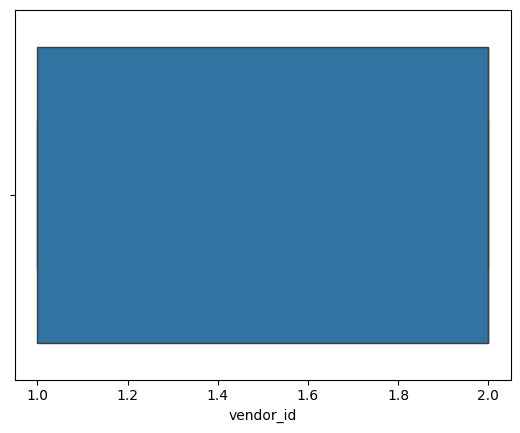

In [111]:
# Box-plot
sns.boxplot(df_new,x="vendor_id")

In [112]:
df["vendor_id"].value_counts()

,count
vendor_id,
2,309717
1,269750


<Axes: xlabel='vendor_id', ylabel='Count'>

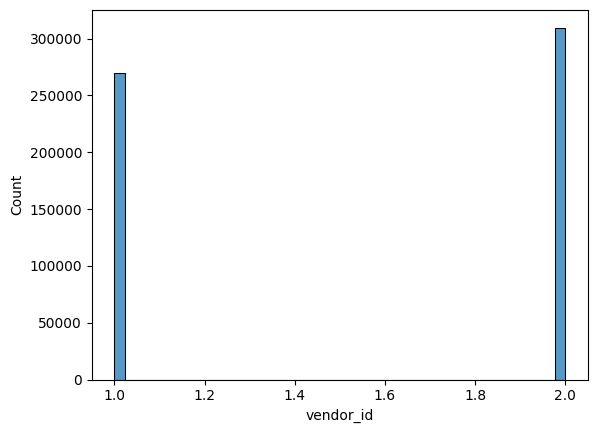

In [113]:
# Histogram
sns.histplot(df_new,x="vendor_id")

### passenger_count

<Axes: xlabel='passenger_count', ylabel='Count'>

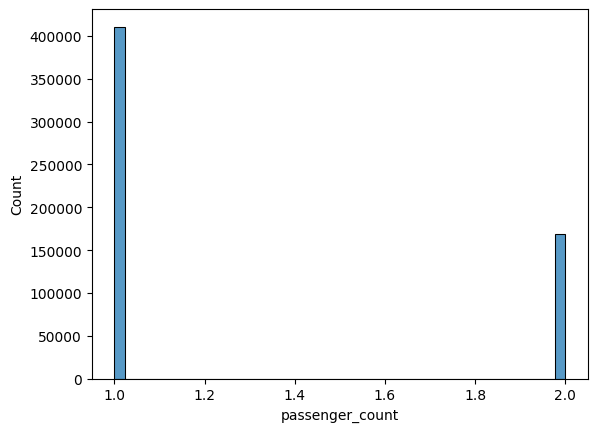

In [114]:
sns.histplot(df_new,x="passenger_count")

### Distance

<Axes: xlabel='distance'>

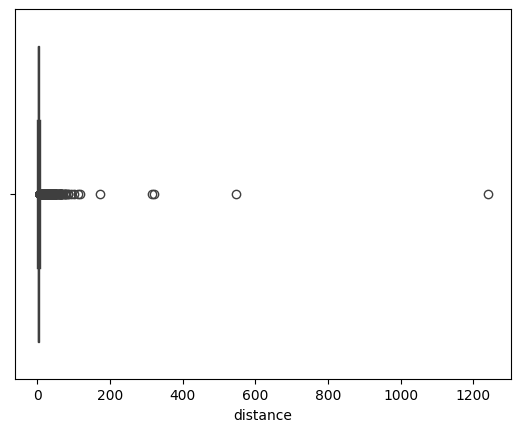

In [115]:
sns.boxplot(df_new,x="distance")

In [116]:
df_new["distance"].value_counts()

,count
distance,
0.000000,2386
0.000424,46
0.000424,27
0.001273,18
0.000848,15
...,...
0.848318,1
10.356246,1
2.248094,1


In [117]:
df_new["distance"].describe()

,distance
count,579467.000000
mean,3.437754
std,4.369988
min,0.000000
25%,1.232907
50%,2.095756
75%,3.874747
max,1240.908677


In [118]:
# Handling Outliters for distance
iqr = df_new["distance"].quantile(0.75) - df_new["distance"].quantile(0.25)

upper_limit = df_new["distance"].quantile(0.75) + 1.5 * iqr
lower_limit = df_new["distance"].quantile(0.25) - 1.5 * iqr

In [119]:
upper_limit,lower_limit

(7.837505963880818, -2.7298515934224903)

In [121]:
lower_limit = 0 # Distance cannot be negative

In [122]:
df_new["distance"] = np.where(df_new["distance"]<upper_limit,df_new["distance"],upper_limit)

In [124]:
df_new["distance"].describe()

,distance
count,579467.000000
mean,2.900228
std,2.244090
min,0.000000
25%,1.232907
50%,2.095756
75%,3.874747
max,7.837506


<Axes: xlabel='distance'>

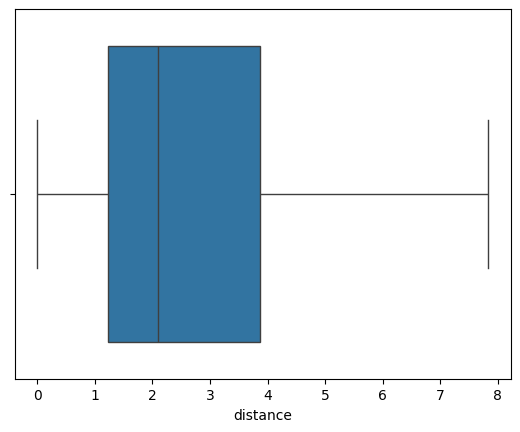

In [125]:
sns.boxplot(df_new,x="distance")

### pickup_datetime

In [126]:
df_new.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,store_and_fwd_flag,trip_duration,distance
0,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1.0,N,455,1.498521
1,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1.0,N,663,1.805507
2,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1.0,N,2124,6.385098
3,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1.0,N,429,1.485498
4,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1.0,N,435,1.188588


In [127]:
df_new.drop("dropoff_datetime",axis=1,inplace=True)

In [128]:
df_new.head()

,vendor_id,pickup_datetime,passenger_count,store_and_fwd_flag,trip_duration,distance
0,2,2016-03-14 17:24:55,1.0,N,455,1.498521
1,1,2016-06-12 00:43:35,1.0,N,663,1.805507
2,2,2016-01-19 11:35:24,1.0,N,2124,6.385098
3,2,2016-04-06 19:32:31,1.0,N,429,1.485498
4,2,2016-03-26 13:30:55,1.0,N,435,1.188588


In [129]:
year = df_new["pickup_datetime"].dt.year
month = df_new["pickup_datetime"].dt.month
days = df_new["pickup_datetime"].dt.day
hours = df_new["pickup_datetime"].dt.hour
minutes = df_new["pickup_datetime"].dt.minute
seconds = df_new["pickup_datetime"].dt.second

In [130]:
year.shape,month.shape,days.shape,hours.shape,minutes.shape,seconds.shape

((579467,), (579467,), (579467,), (579467,), (579467,), (579467,))

In [131]:
df_new = df_new.reset_index()

In [132]:
df_new["year"] = df_new["pickup_datetime"].dt.year

In [133]:
df_new.head()

,index,vendor_id,pickup_datetime,passenger_count,store_and_fwd_flag,trip_duration,distance,year
0,0,2,2016-03-14 17:24:55,1.0,N,455,1.498521,2016
1,1,1,2016-06-12 00:43:35,1.0,N,663,1.805507,2016
2,2,2,2016-01-19 11:35:24,1.0,N,2124,6.385098,2016
3,3,2,2016-04-06 19:32:31,1.0,N,429,1.485498,2016
4,4,2,2016-03-26 13:30:55,1.0,N,435,1.188588,2016


In [134]:
df_new.isnull().sum()

,0
index,0
vendor_id,0
pickup_datetime,0
passenger_count,0
store_and_fwd_flag,0
trip_duration,0
distance,0
year,0


In [135]:
df_new["month"] = df_new["pickup_datetime"].dt.month
df_new["days"] = df_new["pickup_datetime"].dt.day
df_new["hour"] = df_new["pickup_datetime"].dt.hour
df_new["minute"] = df_new["pickup_datetime"].dt.minute
df_new["second"] = df_new["pickup_datetime"].dt.second

In [136]:
df_new.head()

,index,vendor_id,pickup_datetime,passenger_count,store_and_fwd_flag,trip_duration,distance,year,month,days,hour,minute,second
0,0,2,2016-03-14 17:24:55,1.0,N,455,1.498521,2016,3,14,17,24,55
1,1,1,2016-06-12 00:43:35,1.0,N,663,1.805507,2016,6,12,0,43,35
2,2,2,2016-01-19 11:35:24,1.0,N,2124,6.385098,2016,1,19,11,35,24
3,3,2,2016-04-06 19:32:31,1.0,N,429,1.485498,2016,4,6,19,32,31
4,4,2,2016-03-26 13:30:55,1.0,N,435,1.188588,2016,3,26,13,30,55


In [137]:
df_new.isnull().sum()

,0
index,0
vendor_id,0
pickup_datetime,0
passenger_count,0
store_and_fwd_flag,0
trip_duration,0
distance,0
year,0
month,0
days,0


In [138]:
df_new.shape

(579467, 13)

In [139]:
df_new["year"].value_counts()

,count
year,
2016,579467


In [140]:
df_new.drop("year",axis=1,inplace=True)

In [141]:
df_new.head()

,index,vendor_id,pickup_datetime,passenger_count,store_and_fwd_flag,trip_duration,distance,month,days,hour,minute,second
0,0,2,2016-03-14 17:24:55,1.0,N,455,1.498521,3,14,17,24,55
1,1,1,2016-06-12 00:43:35,1.0,N,663,1.805507,6,12,0,43,35
2,2,2,2016-01-19 11:35:24,1.0,N,2124,6.385098,1,19,11,35,24
3,3,2,2016-04-06 19:32:31,1.0,N,429,1.485498,4,6,19,32,31
4,4,2,2016-03-26 13:30:55,1.0,N,435,1.188588,3,26,13,30,55


In [142]:
df_new.shape

(579467, 12)

In [143]:
df_new.drop("index",axis=1,inplace=True)

In [144]:
df_new.head()

,vendor_id,pickup_datetime,passenger_count,store_and_fwd_flag,trip_duration,distance,month,days,hour,minute,second
0,2,2016-03-14 17:24:55,1.0,N,455,1.498521,3,14,17,24,55
1,1,2016-06-12 00:43:35,1.0,N,663,1.805507,6,12,0,43,35
2,2,2016-01-19 11:35:24,1.0,N,2124,6.385098,1,19,11,35,24
3,2,2016-04-06 19:32:31,1.0,N,429,1.485498,4,6,19,32,31
4,2,2016-03-26 13:30:55,1.0,N,435,1.188588,3,26,13,30,55


In [145]:
df_new.shape

(579467, 11)

In [146]:
df_new.month.value_counts()

,count
month,
3,101728
4,100204
5,98484
2,94939
6,92813
1,91299


In [147]:
df_new.describe()

,vendor_id,pickup_datetime,passenger_count,trip_duration,distance,month,days,hour,minute,second
count,579467.000000,579467,579467.000000,5.794670e+05,579467.000000,579467.000000,579467.000000,579467.000000,579467.000000,579467.000000
mean,1.534486,2016-04-01 08:15:14.315374336,1.291152,9.521336e+02,2.900228,3.514393,15.497233,13.606813,29.564759,29.459947
min,1.000000,2016-01-01 00:00:17,1.000000,1.000000e+00,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,2016-02-17 14:18:04,1.000000,3.970000e+02,1.232907,2.000000,8.000000,9.000000,15.000000,14.000000
50%,2.000000,2016-04-01 15:15:57,1.000000,6.620000e+02,2.095756,4.000000,15.000000,14.000000,30.000000,29.000000
75%,2.000000,2016-05-15 01:05:14,2.000000,1.075000e+03,3.874747,5.000000,23.000000,19.000000,45.000000,44.000000
max,2.000000,2016-06-30 23:59:39,2.000000,1.939736e+06,7.837506,6.000000,31.000000,23.000000,59.000000,59.000000
std,0.498810,NaN,0.454294,4.027519e+03,2.244090,1.680400,8.696736,6.397399,17.327790,17.313017


<Axes: xlabel='month'>

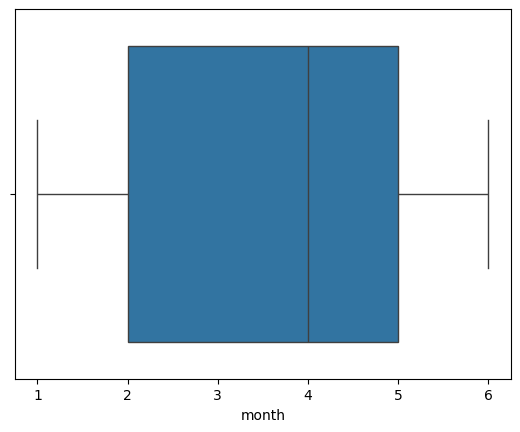

In [149]:
sns.boxplot(df_new , x = df_new["month"])

<Axes: ylabel='days'>

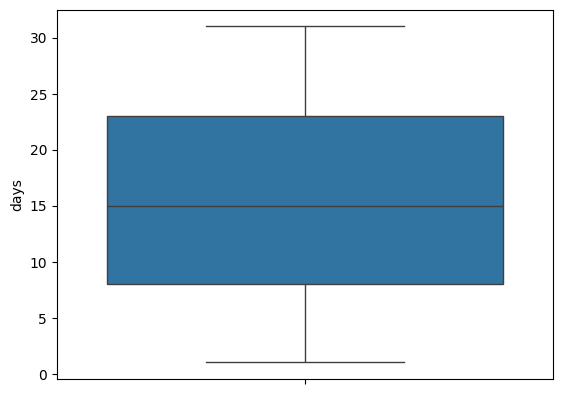

In [150]:
sns.boxplot(df_new["days"])

<Axes: ylabel='hour'>

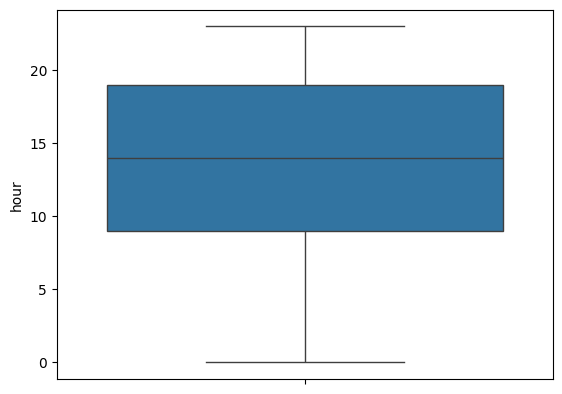

In [151]:
sns.boxplot(df_new["hour"])

<Axes: ylabel='second'>

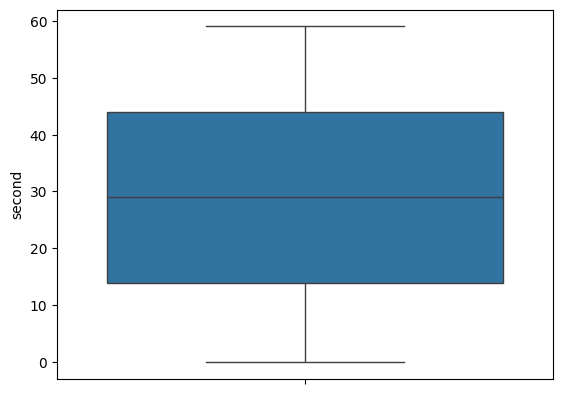

In [152]:
sns.boxplot(df_new["second"])

<Axes: ylabel='minute'>

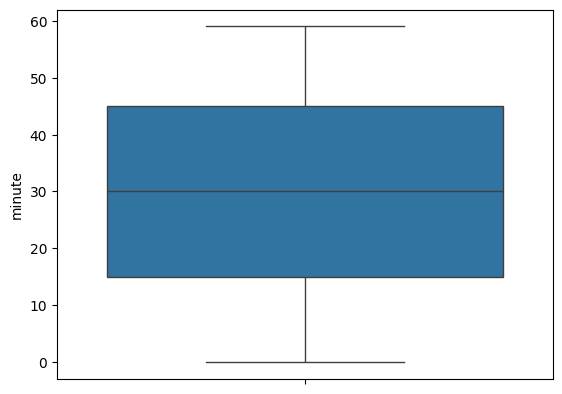

In [153]:
sns.boxplot(df_new["minute"])

In [154]:
df_new.head()

,vendor_id,pickup_datetime,passenger_count,store_and_fwd_flag,trip_duration,distance,month,days,hour,minute,second
0,2,2016-03-14 17:24:55,1.0,N,455,1.498521,3,14,17,24,55
1,1,2016-06-12 00:43:35,1.0,N,663,1.805507,6,12,0,43,35
2,2,2016-01-19 11:35:24,1.0,N,2124,6.385098,1,19,11,35,24
3,2,2016-04-06 19:32:31,1.0,N,429,1.485498,4,6,19,32,31
4,2,2016-03-26 13:30:55,1.0,N,435,1.188588,3,26,13,30,55


In [157]:
df_new.drop("pickup_datetime",axis = 1 , inplace = True)

In [158]:
df_new.head()

,vendor_id,passenger_count,store_and_fwd_flag,trip_duration,distance,month,days,hour,minute,second
0,2,1.0,N,455,1.498521,3,14,17,24,55
1,1,1.0,N,663,1.805507,6,12,0,43,35
2,2,1.0,N,2124,6.385098,1,19,11,35,24
3,2,1.0,N,429,1.485498,4,6,19,32,31
4,2,1.0,N,435,1.188588,3,26,13,30,55


In [159]:
df_new.shape

(579467, 10)

In [160]:
from sklearn.preprocessing import OneHotEncoder

In [161]:
ohe = OneHotEncoder(sparse=False,drop="first")

In [162]:
store_and_fwd_flag_encoded = ohe.fit_transform(df_new[["store_and_fwd_flag"]])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [163]:
df_new.head()

,vendor_id,passenger_count,store_and_fwd_flag,trip_duration,distance,month,days,hour,minute,second
0,2,1.0,N,455,1.498521,3,14,17,24,55
1,1,1.0,N,663,1.805507,6,12,0,43,35
2,2,1.0,N,2124,6.385098,1,19,11,35,24
3,2,1.0,N,429,1.485498,4,6,19,32,31
4,2,1.0,N,435,1.188588,3,26,13,30,55


In [164]:
ohe.categories_

[array(['N', 'Y'], dtype=object)]

In [165]:
df_new["Y"] = store_and_fwd_flag_encoded

In [166]:
df_new.head()

,vendor_id,passenger_count,store_and_fwd_flag,trip_duration,distance,month,days,hour,minute,second,Y
0,2,1.0,N,455,1.498521,3,14,17,24,55,0.0
1,1,1.0,N,663,1.805507,6,12,0,43,35,0.0
2,2,1.0,N,2124,6.385098,1,19,11,35,24,0.0
3,2,1.0,N,429,1.485498,4,6,19,32,31,0.0
4,2,1.0,N,435,1.188588,3,26,13,30,55,0.0


In [170]:
df_new.rename({"Y":"Yes_store_and_fwd_flag"},axis=1,inplace=True)

In [171]:
df_new.head()

,vendor_id,passenger_count,store_and_fwd_flag,trip_duration,distance,month,days,hour,minute,second,Yes_store_and_fwd_flag
0,2,1.0,N,455,1.498521,3,14,17,24,55,0.0
1,1,1.0,N,663,1.805507,6,12,0,43,35,0.0
2,2,1.0,N,2124,6.385098,1,19,11,35,24,0.0
3,2,1.0,N,429,1.485498,4,6,19,32,31,0.0
4,2,1.0,N,435,1.188588,3,26,13,30,55,0.0


In [172]:
df_new.drop("store_and_fwd_flag",axis=1,inplace=True)

In [173]:
df_new.head()

,vendor_id,passenger_count,trip_duration,distance,month,days,hour,minute,second,Yes_store_and_fwd_flag
0,2,1.0,455,1.498521,3,14,17,24,55,0.0
1,1,1.0,663,1.805507,6,12,0,43,35,0.0
2,2,1.0,2124,6.385098,1,19,11,35,24,0.0
3,2,1.0,429,1.485498,4,6,19,32,31,0.0
4,2,1.0,435,1.188588,3,26,13,30,55,0.0


In [174]:
df_new.shape

(579467, 10)

In [175]:
df_new.corr()

,vendor_id,passenger_count,trip_duration,distance,month,days,hour,minute,second,Yes_store_and_fwd_flag
vendor_id,1.000000,0.210830,0.026135,0.006408,-0.007038,0.002070,0.008556,-0.000160,0.002785,-0.080957
passenger_count,0.210830,1.000000,0.010478,0.019587,0.002706,0.001377,0.025071,0.000472,-0.000187,-0.015352
trip_duration,0.026135,0.010478,1.000000,0.127648,0.008933,0.000773,0.003796,-0.004749,0.002274,0.002356
distance,0.006408,0.019587,0.127648,1.000000,0.020279,0.008773,-0.026401,-0.009620,-0.001210,0.023625
month,-0.007038,0.002706,0.008933,0.020279,1.000000,-0.013113,-0.003770,-0.002685,-0.000369,0.001834
days,0.002070,0.001377,0.000773,0.008773,-0.013113,1.000000,0.001958,0.000599,-0.001713,0.002664
hour,0.008556,0.025071,0.003796,-0.026401,-0.003770,0.001958,1.000000,-0.002849,0.001008,0.002493
minute,-0.000160,0.000472,-0.004749,-0.009620,-0.002685,0.000599,-0.002849,1.000000,-0.000625,0.001236
second,0.002785,-0.000187,0.002274,-0.001210,-0.000369,-0.001713,0.001008,-0.000625,1.000000,0.001374
Yes_store_and_fwd_flag,-0.080957,-0.015352,0.002356,0.023625,0.001834,0.002664,0.002493,0.001236,0.001374,1.000000


In [176]:
df_new['final_seconds'] = df_new['hour'] * 3600 + df_new['minute'] * 60 + df_new['second']

In [177]:
df_new.head()

,vendor_id,passenger_count,trip_duration,distance,month,days,hour,minute,second,Yes_store_and_fwd_flag,final_seconds
0,2,1.0,455,1.498521,3,14,17,24,55,0.0,62695
1,1,1.0,663,1.805507,6,12,0,43,35,0.0,2615
2,2,1.0,2124,6.385098,1,19,11,35,24,0.0,41724
3,2,1.0,429,1.485498,4,6,19,32,31,0.0,70351
4,2,1.0,435,1.188588,3,26,13,30,55,0.0,48655


In [178]:
df_new.corr()

,vendor_id,passenger_count,trip_duration,distance,month,days,hour,minute,second,Yes_store_and_fwd_flag,final_seconds
vendor_id,1.000000,0.210830,0.026135,0.006408,-0.007038,0.002070,0.008556,-0.000160,0.002785,-0.080957,0.008544
passenger_count,0.210830,1.000000,0.010478,0.019587,0.002706,0.001377,0.025071,0.000472,-0.000187,-0.015352,0.025070
trip_duration,0.026135,0.010478,1.000000,0.127648,0.008933,0.000773,0.003796,-0.004749,0.002274,0.002356,0.003580
distance,0.006408,0.019587,0.127648,1.000000,0.020279,0.008773,-0.026401,-0.009620,-0.001210,0.023625,-0.026812
month,-0.007038,0.002706,0.008933,0.020279,1.000000,-0.013113,-0.003770,-0.002685,-0.000369,0.001834,-0.003888
days,0.002070,0.001377,0.000773,0.008773,-0.013113,1.000000,0.001958,0.000599,-0.001713,0.002664,0.001982
hour,0.008556,0.025071,0.003796,-0.026401,-0.003770,0.001958,1.000000,-0.002849,0.001008,0.002493,0.998982
minute,-0.000160,0.000472,-0.004749,-0.009620,-0.002685,0.000599,-0.002849,1.000000,-0.000625,0.001236,0.042256
second,0.002785,-0.000187,0.002274,-0.001210,-0.000369,-0.001713,0.001008,-0.000625,1.000000,0.001374,0.001730
Yes_store_and_fwd_flag,-0.080957,-0.015352,0.002356,0.023625,0.001834,0.002664,0.002493,0.001236,0.001374,1.000000,0.002547


In [179]:
df_new.drop(["hour","second","minute"],axis=1,inplace=True)

In [180]:
df_new.head()

,vendor_id,passenger_count,trip_duration,distance,month,days,Yes_store_and_fwd_flag,final_seconds
0,2,1.0,455,1.498521,3,14,0.0,62695
1,1,1.0,663,1.805507,6,12,0.0,2615
2,2,1.0,2124,6.385098,1,19,0.0,41724
3,2,1.0,429,1.485498,4,6,0.0,70351
4,2,1.0,435,1.188588,3,26,0.0,48655


In [181]:
df_new.shape

(579467, 8)

## Experimenting

In [182]:
import seaborn as sns

Text(0.5, 1.0, 'Correlation Matrix')

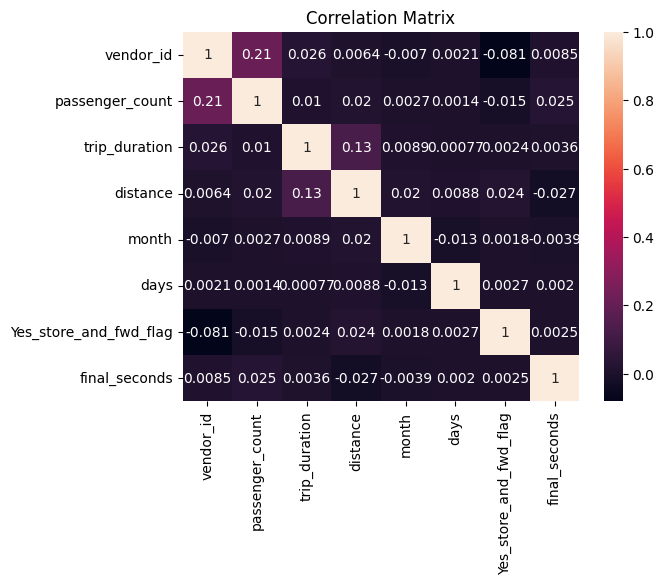

In [183]:
sns.heatmap(df_new.corr(), annot=True)
plt.title('Correlation Matrix')

In [184]:
# Calculating speed
speed = []
for i in range(df.shape[0]):
    if df_new['final_seconds'][i] != 0:
        speed_value = df_new["distance"][i] / df_new['final_seconds'][i]
    else:
        speed_value = np.nan  # Assign NaN when denominator is zero

    speed.append(speed_value)

In [185]:
df_new["speed"] = speed

In [186]:
df_new.head()

,vendor_id,passenger_count,trip_duration,distance,month,days,Yes_store_and_fwd_flag,final_seconds,speed
0,2,1.0,455,1.498521,3,14,0.0,62695,0.000024
1,1,1.0,663,1.805507,6,12,0.0,2615,0.000690
2,2,1.0,2124,6.385098,1,19,0.0,41724,0.000153
3,2,1.0,429,1.485498,4,6,0.0,70351,0.000021
4,2,1.0,435,1.188588,3,26,0.0,48655,0.000024


In [187]:
df_new.isnull().sum()

,0
vendor_id,0
passenger_count,0
trip_duration,0
distance,0
month,0
days,0
Yes_store_and_fwd_flag,0
final_seconds,0
speed,6


## Splitting the data

In [188]:
X = df_new.drop(['trip_duration','speed'], axis=1)
y = df_new['trip_duration']

In [190]:
X.head()

,vendor_id,passenger_count,distance,month,days,Yes_store_and_fwd_flag,final_seconds
0,2,1.0,1.498521,3,14,0.0,62695
1,1,1.0,1.805507,6,12,0.0,2615
2,2,1.0,6.385098,1,19,0.0,41724
3,2,1.0,1.485498,4,6,0.0,70351
4,2,1.0,1.188588,3,26,0.0,48655


In [191]:
y.head()

,trip_duration
0,455
1,663
2,2124
3,429
4,435


In [189]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [193]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579467 entries, 0 to 579466
Data columns (total 7 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   vendor_id               579467 non-null  int64  
 1   passenger_count         579467 non-null  float64
 2   distance                579467 non-null  float64
 3   month                   579467 non-null  int32  
 4   days                    579467 non-null  int32  
 5   Yes_store_and_fwd_flag  579467 non-null  float64
 6   final_seconds           579467 non-null  int32  
dtypes: float64(3), int32(3), int64(1)
memory usage: 24.3 MB


In [194]:
X_test.shape

(115894, 7)

In [195]:
# Define non-numeric columns
non_numeric_columns = X_test.select_dtypes(exclude=['float', 'int']).columns

# Now, proceed with dropping non-numeric columns from X_test
X_test_numeric = X_test.drop(columns=non_numeric_columns)

# Fit linear regression model
# lr.fit(X_train_numeric, y_train)

# Predict
# y_pred = lr.predict(X_test_numeric)

# Evaluate the model

In [196]:
X_test_numeric.shape

(115894, 7)

## Model training and evaluation

In [197]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error

In [198]:
# LINEAR REGRESSION
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred1 = lr.predict(X_test_numeric)

s1 = mean_squared_error(y_test,y_pred1,squared=False)

In [199]:
# DECISION TREE
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
y_pred2 = dt.predict(X_test_numeric)

s2 = mean_squared_error(y_test,y_pred2,squared=False)

In [200]:
# GRADIENT BOOSTING
gb = GradientBoostingRegressor()
gb.fit(X_train,y_train)
y_pred3 = gb.predict(X_test_numeric)

s3 = mean_squared_error(y_test,y_pred3,squared=False)

In [201]:
# RANDOM FOREST
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred4 = rf.predict(X_test)

s4 = mean_squared_error(y_test,y_pred4,squared=False)

In [202]:
# XGBOOST
xgb = XGBRegressor(objective ='reg:squarederror', n_estimators = 10, seed = 123)
xgb.fit(X_train, y_train)
y_pred5 = xgb.predict(X_test)

s5 = mean_squared_error(y_test,y_pred5,squared=False)

In [203]:
models = [LinearRegression(),DecisionTreeRegressor(), GradientBoostingRegressor(),RandomForestRegressor(),XGBRegressor()]

for i in range:
  models[i].score(X_train , y_train)
  models[i].score(X_test , y_test)

In [204]:
from joblib import dump

In [205]:
dump(models , 'NYC_models.joblib')

['NYC_models.joblib']

In [206]:
rmse = [s1,s2,s3,s4,s5]

df3 = pd.DataFrame({'Model':models, 'RMSE':rmse})

In [207]:
df3

,Model,RMSE
0,LinearRegression(),3117.135149
1,DecisionTreeRegressor(),4431.590455
2,GradientBoostingRegressor(),3128.145332
3,RandomForestRegressor(),3443.016209
4,"XGBRegressor(base_score=None, booster=None, ca...",3146.737072
